In [1]:
import dataUtils as du
import numpy as np
import matplotlib.pyplot as plt

# Load data


In [2]:
#a = 100 #acceleration in steps
#samples = 3 #steps in gridsearch
#stepsize = 20

path_base = "../Data/person_data/"
hz = 30
person_num = 2
start_offset_vals = [38,55,58,58,48,64,72,63,62,62]

#load all data
df = du.load_testperson2(person_num,path_base)

# Change rotations to accurate coordinate system and make translations relative to frame 0
df = du.fixCoordinates(df)

#get valid frames (frames without wobeling/ocscilation)
start_offset = start_offset_vals[person_num] #(frame before action)
tracking_rate = 0.8 #seconds between each image
wanted_frames = 380 #amount of frames to extract
frame_offset = tracking_rate*hz #time between moves
spacing = 1 #how many previous frames that have to be still
t_eps = 1000 #translational error
r_eps =1000 #rotational error


df_valid, valid_idx = du.getValidFrames(df,wanted_frames,frame_offset,start_offset,spacing,t_eps,r_eps)


#LOAD ACTUAL PERSON DATA
path = "../Data/"
f9 = np.load(path+"f9.npz")["arr_0"]
f10 = np.load(path+"f10.npz")["arr_0"]
m9 = np.load(path+"m9.npz")["arr_0"]
m10 = np.load(path+"m10.npz")["arr_0"]


temp1 = np.concatenate((f9,f10),axis=0)
temp2 = np.concatenate((m9,m10),axis = 0)
data = np.concatenate((temp1,temp2),axis=0)

#plot the initial frames shuch that the correct start offset can be found
#plt.figure()
#plt.title("Select start offset frame")
#plt.plot(df["X_rot"][25:100])
#plt.plot(df["Y_rot"][25:100])
#plt.plot(df["Z_rot"][25:100])
#plt.show()



#see min/max values
#print(df_valid.max())
#print(df_valid.min())
#print(df_valid.max()- df_valid.min())

#see tp min/max values
print(data.shape)
print(np.amin(data,axis=(0,1)))
print(np.amax(data,axis=(0,1)))

TOTAL FRAMES: 380 (380)
INVALID FRAMES: 0, VALID FRAMES: 380
(10, 380, 6)
[-0.330214 -2.465026 -0.941532 -5.533569 -0.631801 -0.47057 ]
[0.167386 0.751653 3.856536 2.680239 0.55193  0.815376]


# Plot data

In [3]:
#reoccuring plotting elements
cols = ['X_rot', 'Y_rot', 'Z_rot', 'X_trans', 'Y_trans', 'Z_trans']
colors = ["red","green","blue","red","green","blue"]
frame_idxs = [x for x in range(wanted_frames)]
imitation_name = "Imitation"
tracking_name = "Tracking"
genders = ["female","female","female","female","female","male","male","male","male","male"]
ages = [9,9,9,10,10,9,9,9,10,10]


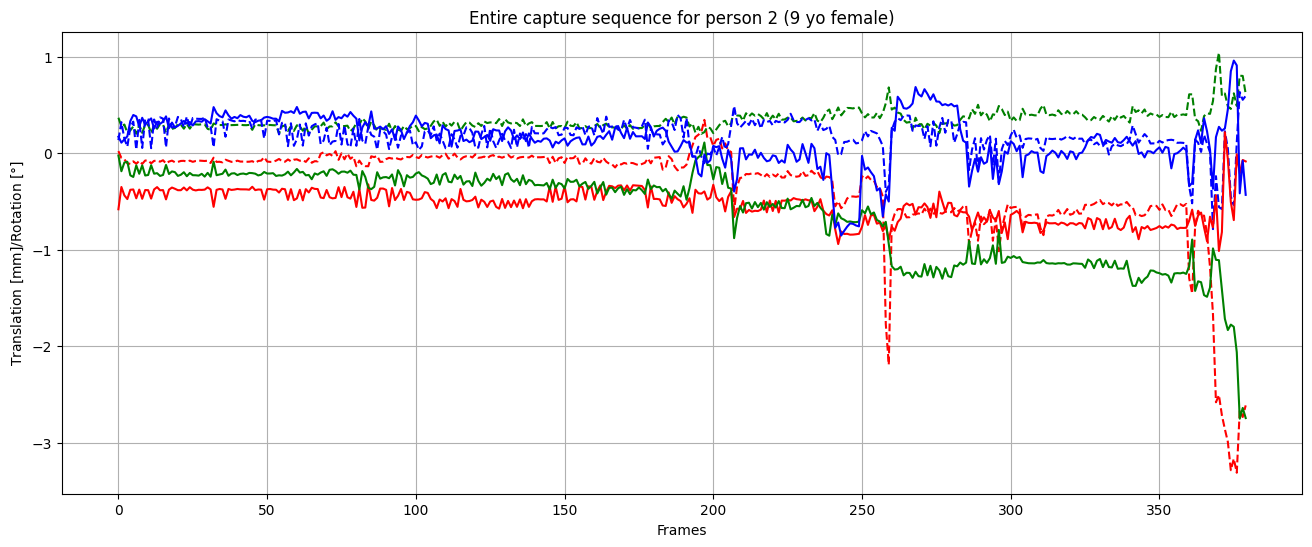

In [4]:
#display entire captured dataset:
plt.figure(figsize=(16,6))
plt.title(f"Entire capture sequence for person {person_num} ({ages[person_num]} yo {genders[person_num]})")
for i in range(2,8):
  if "rot" in df.columns[i]:
    plt.plot(frame_idxs, df_valid.iloc[:, i], label=df.columns[i],c = colors[i-2], linestyle = "--")
  else:
    plt.plot(frame_idxs, df_valid.iloc[:, i], label=df.columns[i],c = colors[i-2])
plt.grid()
plt.xlabel("Frames")
plt.ylabel("Translation [mm]/Rotation [$\degree$]")
plt.show()


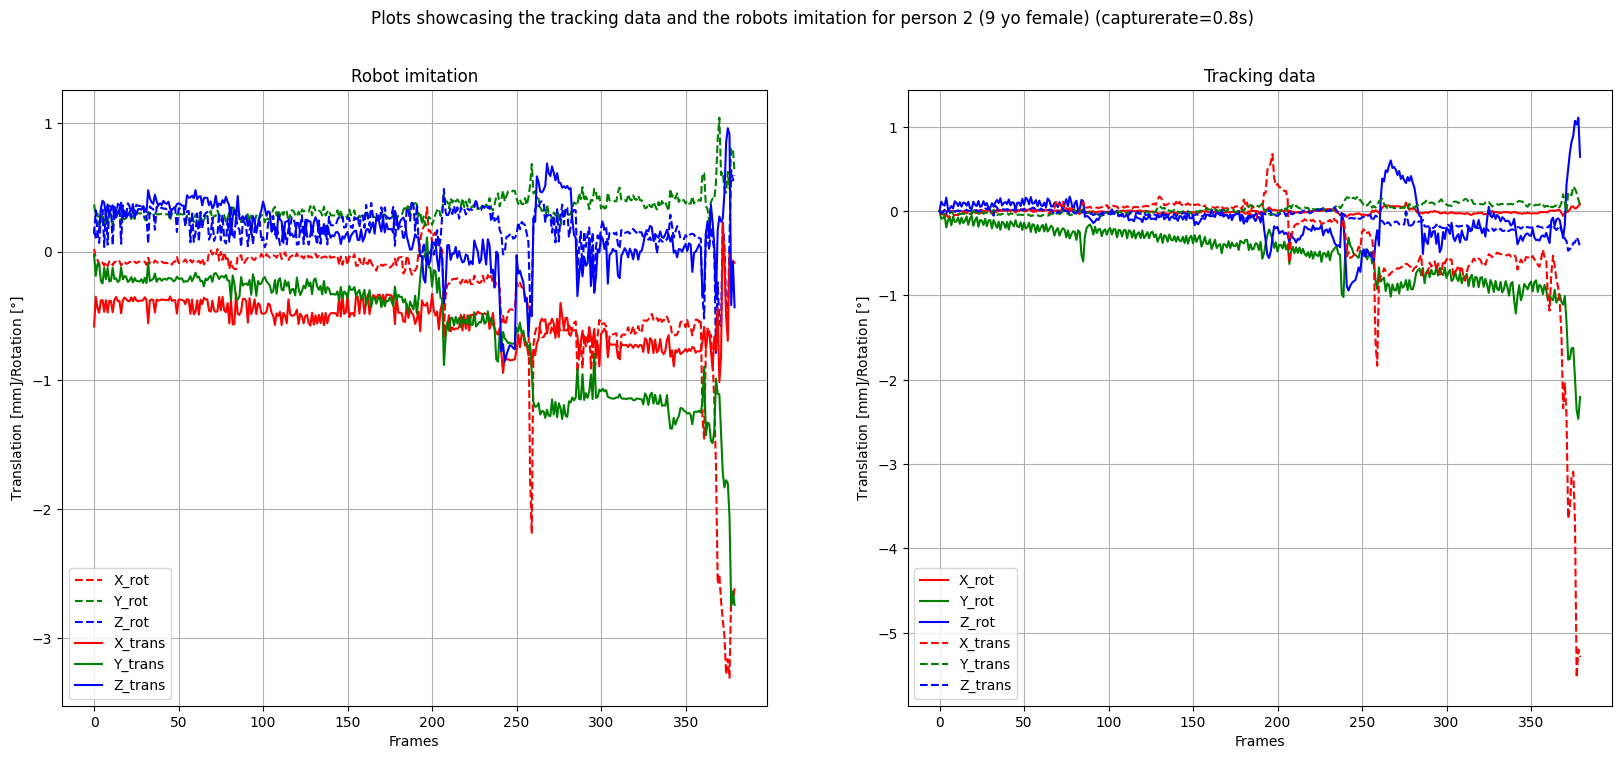

In [5]:
#Display side by side
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.suptitle(f"Plots showcasing the tracking data and the robots imitation for person {person_num} ({ages[person_num]} yo {genders[person_num]}) (capturerate={tracking_rate}s)")
plt.title("Robot imitation")
for i in range(2,8):
  if "rot" in df.columns[i]:
    plt.plot(frame_idxs, df_valid.iloc[:, i], label=df.columns[i],c = colors[i-2], linestyle = "--")
  else:
    plt.plot(frame_idxs, df_valid.iloc[:, i], label=df.columns[i],c = colors[i-2])
plt.grid()
plt.xlabel("Frames")
plt.ylabel("Translation [mm]/Rotation [$\degree$]")
plt.legend()

plt.subplot(1,2,2)
plt.title("Tracking data")
for i in range(6):
    if i < 3:
      plt.plot(frame_idxs, data[person_num,:,i], color = colors[i],label=cols[i])
    else: 
      plt.plot(frame_idxs, data[person_num,:,i], color = colors[i], linestyle = "--",label=cols[i])

plt.grid()
plt.ylabel("Translation [mm]/Rotation [$\degree$]")
plt.xlabel("Frames")
plt.legend()
plt.show()

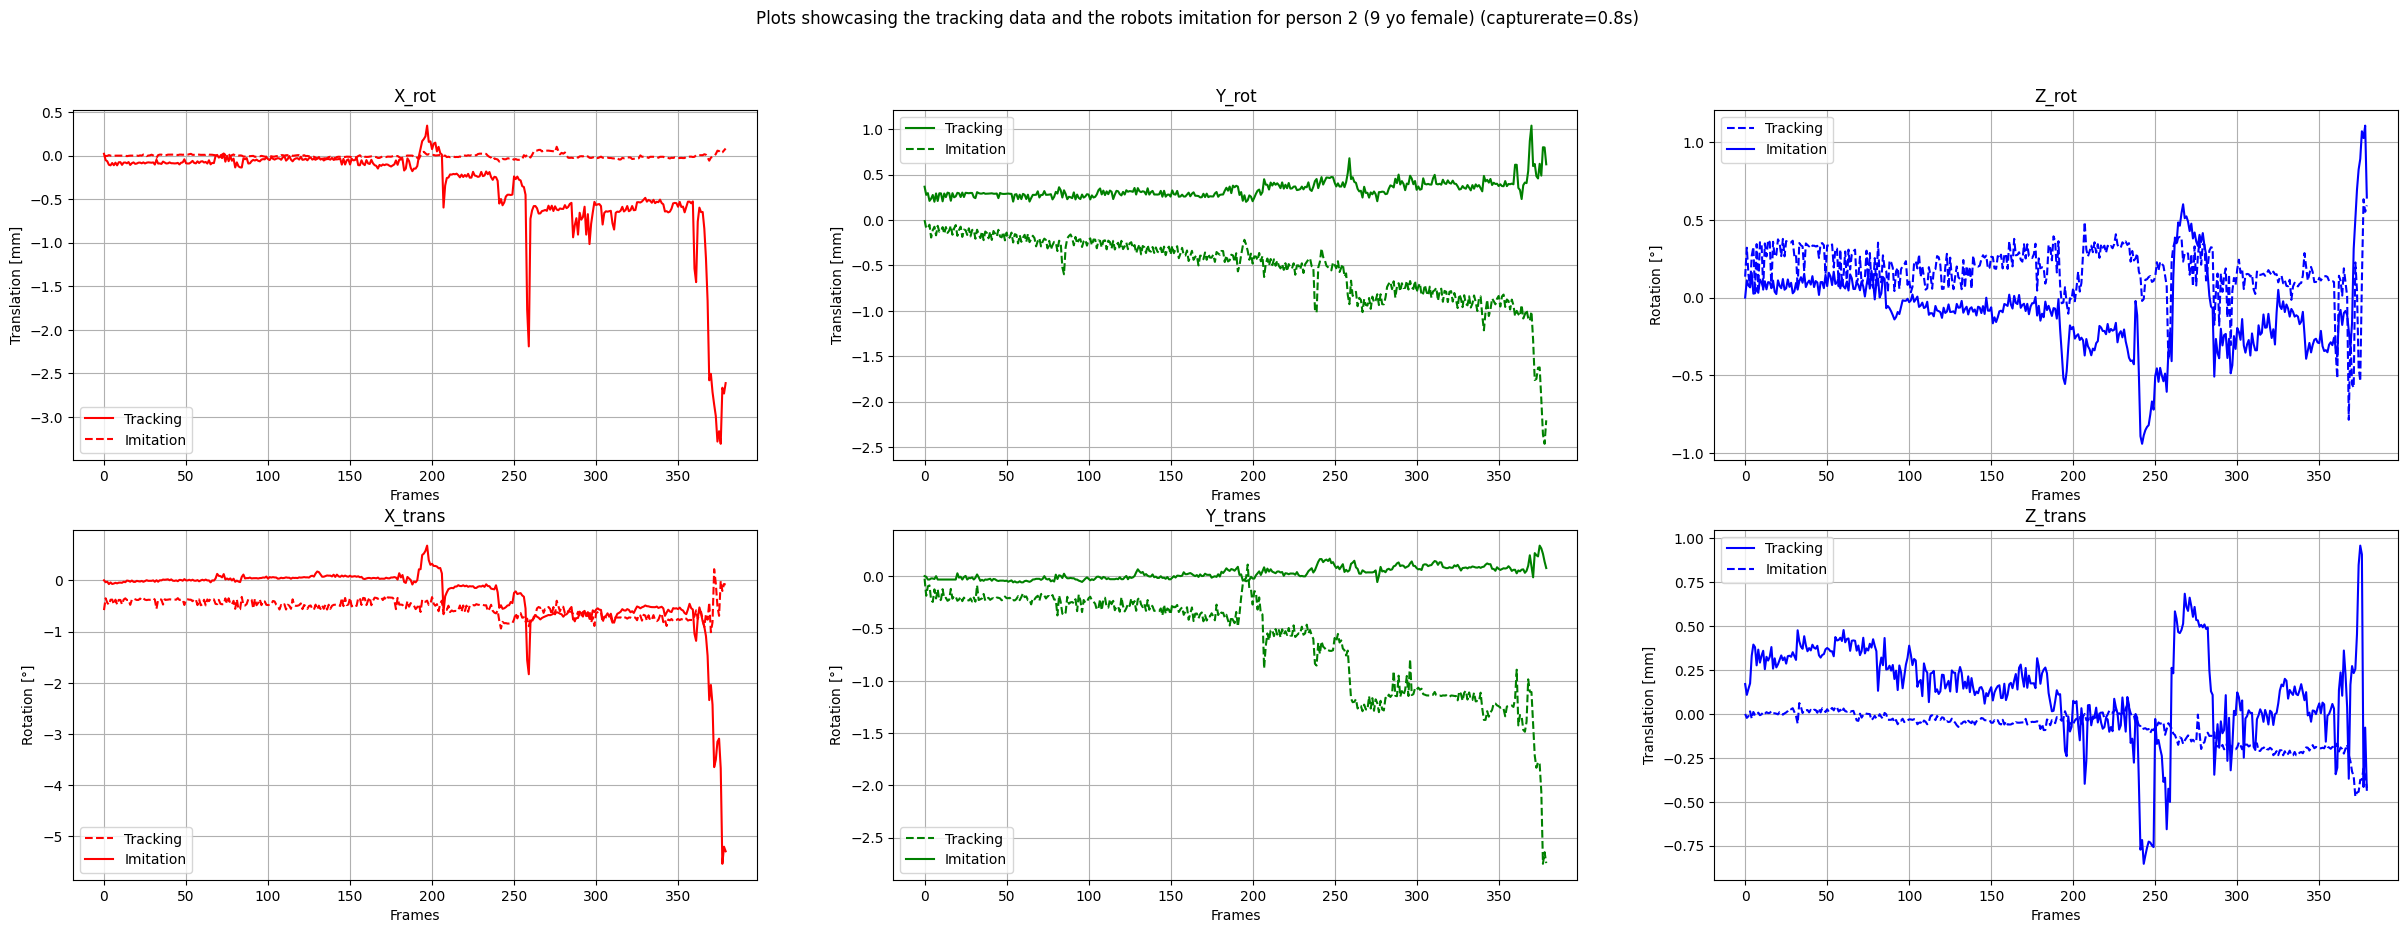

In [6]:
plt.figure(figsize=(30,10))
plt.suptitle(f"Plots showcasing the tracking data and the robots imitation for person {person_num} ({ages[person_num]} yo {genders[person_num]}) (capturerate={tracking_rate}s)")

for i in range(6):
  plt.subplot(2,3,i+1)
  plt.title(f"{cols[i]}")
  if "rot" in df.columns[i]: #rot
    plt.plot(frame_idxs, df_valid.iloc[:, i+2], label=tracking_name,c = colors[i], linestyle = "--")
    plt.plot(frame_idxs, data[person_num,:,i], color = colors[i],label=imitation_name)
    plt.ylabel("Rotation [$\degree$]")
  else: #trans
    plt.plot(frame_idxs, df_valid.iloc[:, i+2], label=tracking_name,c = colors[i])
    plt.plot(frame_idxs, data[person_num,:,i], color = colors[i], linestyle = "--",label=imitation_name)
    plt.ylabel("Translation [mm]")
  plt.grid()
  plt.xlabel("Frames")
  plt.legend()
plt.show()


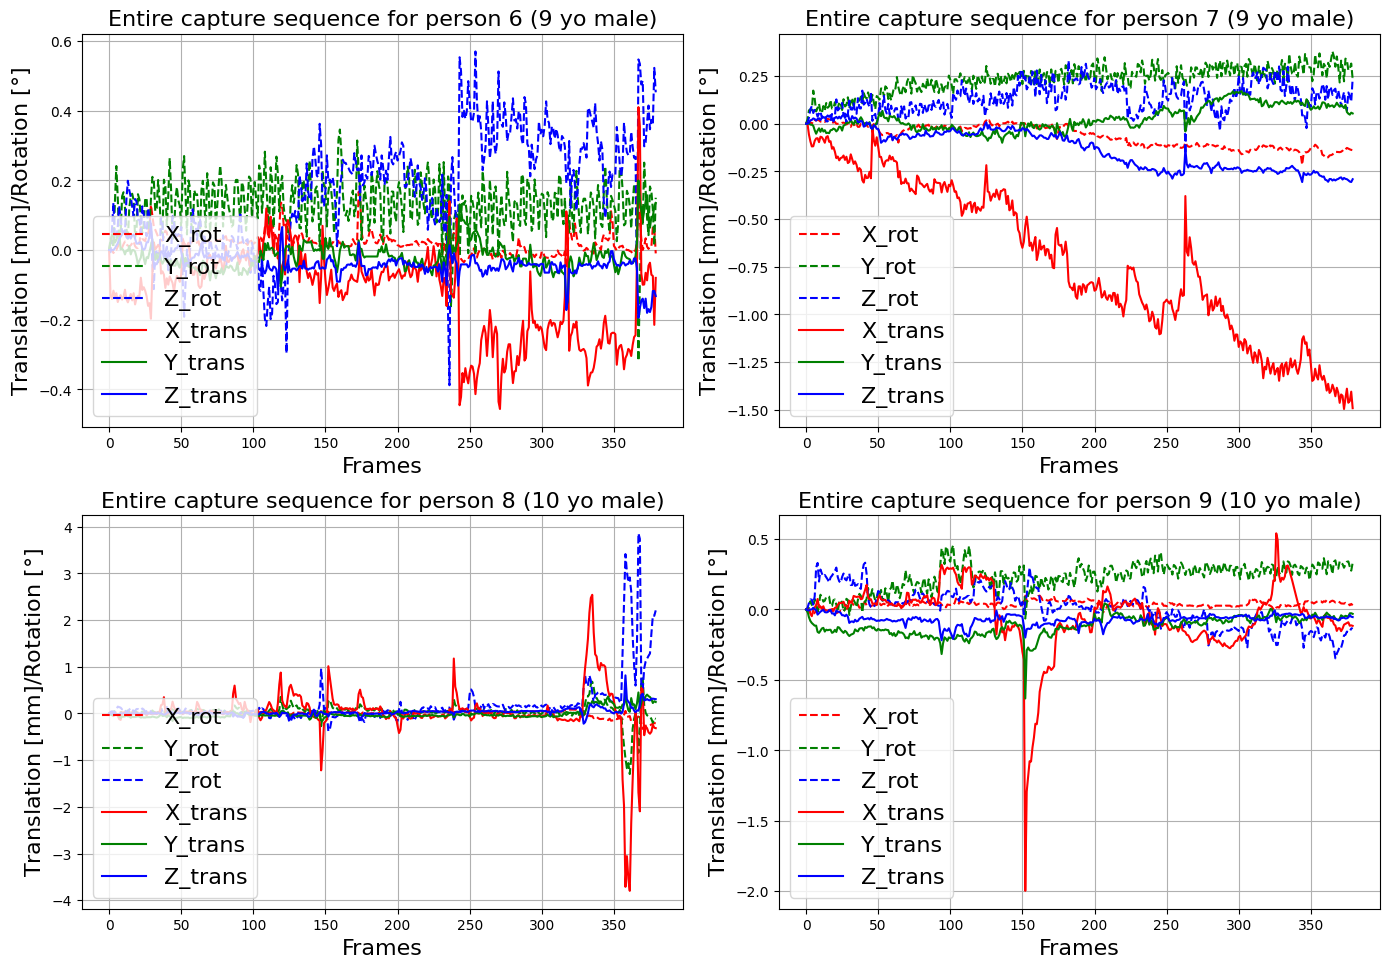

In [13]:
#plot for all 10 tps
plt.figure(figsize=(14,24))
for j in range(6,10):
  plt.subplot(5,2,j+1)
  plt.title(f"Entire capture sequence for person {j} ({ages[j]} yo {genders[j]})", fontsize=16)
  for i in range(2,8):
    if "rot" in df.columns[i]:
      plt.plot(frame_idxs, data[j,:,i-2], label=df.columns[i],c = colors[i-2], linestyle = "--")
    else:
      plt.plot(frame_idxs, data[j,:,i-2], label=df.columns[i],c = colors[i-2])
      
  plt.grid()
  plt.xlabel("Frames", fontsize=16)
  plt.ylabel("Translation [mm]/Rotation [$\degree$]", fontsize=16)
  plt.legend(fontsize=16,loc="lower left")
  plt.tight_layout()
plt.show()
